In [10]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from scipy import signal
from keras import optimizers
from tensorflow.keras.layers import Lambda
from keras import backend as K
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy

A1

In [12]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_X1 = train_X[0:100]
train_Y1 = train_Y[:100]
val_X = train_X[100:150]
val_Y_Onehot = to_categorical(train_Y[100:150])
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

In [13]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

A2

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.0979 - loss: 2.3322 - val_accuracy: 0.0200 - val_loss: 2.3474
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1535 - loss: 2.1871 - val_accuracy: 0.1000 - val_loss: 2.2746
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2144 - loss: 2.0385 - val_accuracy: 0.3000 - val_loss: 2.1896
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4429 - loss: 1.8752 - val_accuracy: 0.3600 - val_loss: 1.9999
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4815 - loss: 1.6659 - val_accuracy: 0.5600 - val_loss: 1.7880
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5950 - loss: 1.4595 - val_accuracy: 0.6200 - val_loss: 1.5860
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6587 - loss: 1.2754 - val_accuracy: 0.5400 - val_loss: 1.4761
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6654 - loss: 1.0696 - val_accuracy: 0.5800 - v

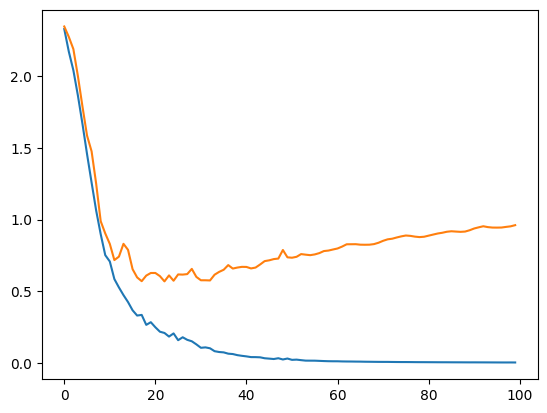

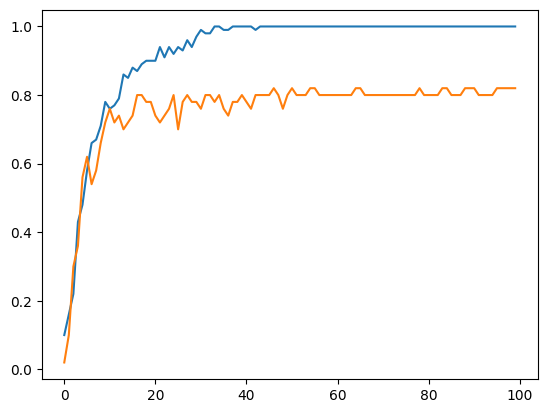

In [14]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=100, validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

A3

In [15]:
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6887 - loss: 1.8487

Keras CNN binary accuracy: 0.6800000071525574 



A4

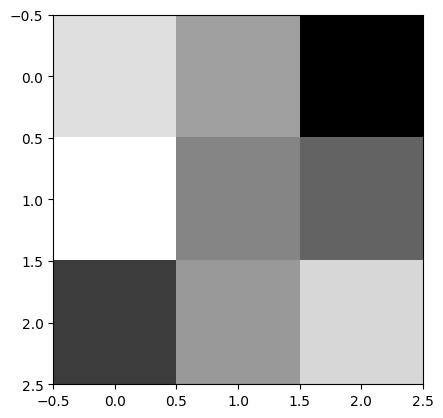

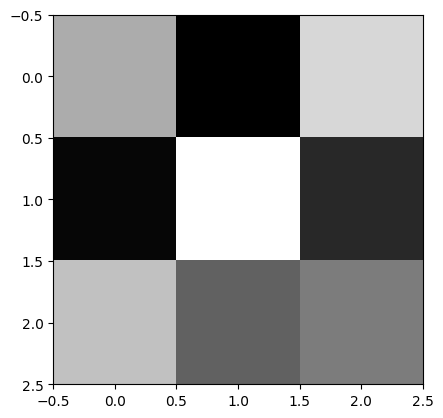

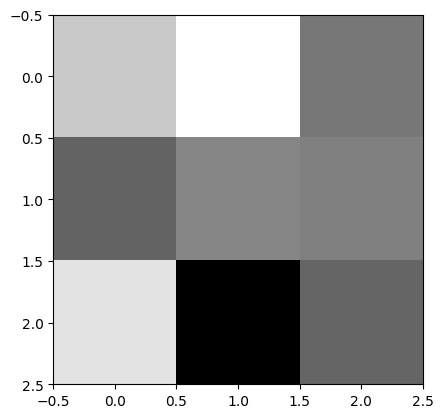

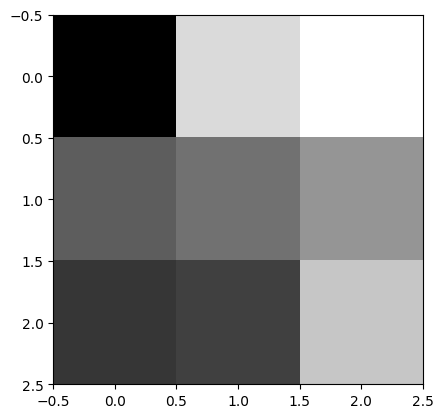

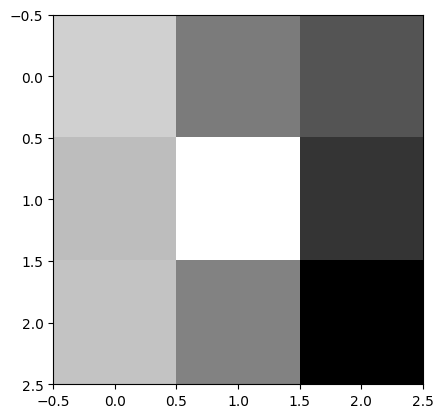

In [16]:
filters, biases = model.layers[0].get_weights()
for i in range(5):
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.show()

A5

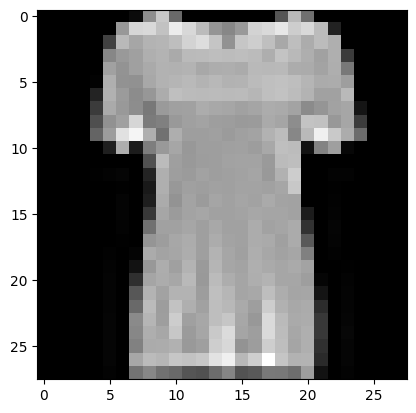

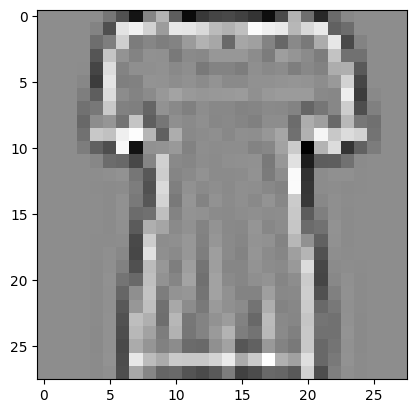

In [17]:
filt = np.array([
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]
])

im = train_X[10]


plt.imshow(im, cmap='gray')
plt.show()


ot = signal.convolve2d(im.reshape(28, 28), filt[0], boundary='symm', mode='same')

plt.imshow(ot, cmap='gray')
plt.show()

A6

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

#  Build Fully Connected Dense Network
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Convert 28x28 image to 1D
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes (output layer)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train Model
history = model.fit(train_X1, train_Y_one_hot,
                    validation_data=(val_X, val_Y_Onehot),
                    epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0398 - loss: 2.4226 - val_accuracy: 0.3400 - val_loss: 2.0797
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2614 - loss: 1.9863 - val_accuracy: 0.5400 - val_loss: 1.8914
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4416 - loss: 1.7256 - val_accuracy: 0.4600 - val_loss: 1.7057
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4019 - loss: 1.6695 - val_accuracy: 0.4400 - val_loss: 1.5833
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5324 - loss: 1.4556 - val_accuracy: 0.6600 - val_loss: 1.3643
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5416 - loss: 1.3857 - val_accuracy: 0.7000 - val_loss: 1.1983
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5357 - loss: 1.3181 - val_accuracy: 0.7200 - val_loss: 1.0710
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6559 - loss: 1.0861 - val_accuracy: 0.7600 - val_loss: 1.0101
Epoch 9/50


A7

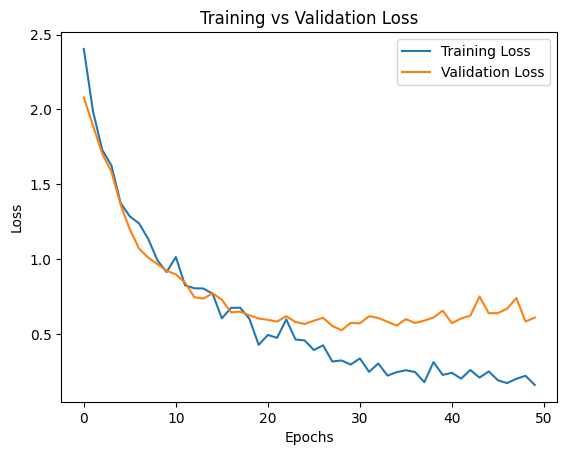

In [19]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

A8

In [20]:
#Test Model on Test Set
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7021 - loss: 0.9635
Test Accuracy: 0.7025
